In [2]:
# library load

## 분석 툴
import pandas as pd

## 시각화 툴
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

##한글설정
import matplotlib.font_manager as fm

font_dirs = ['/Users/Dacon/AppData/Local/Microsoft/Windows/Fonts', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

## warnings 무시
import warnings
warnings.filterwarnings(action='ignore')

## 결과 확인을 용이하게 하기 위해 실행하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [3]:
# pwd

In [5]:
# data load
train = pd.read_csv('train.csv') # 모델 학습 파일
test = pd.read_csv('test.csv') # 모델 시험지 파일
submission = pd.read_csv('sample_submission.csv') #답안지 파일 ; 제출 파일 형식

# 2️⃣  <span style = 'background-color: #94c9e4 ; color:black'>**탐색적 자료분석**</span> <a class = 'anchor' id = 'chapter2'></a>
Exploratory Data Analysis (EDA)

### <span style = 'color:#3c7cde'> **Columns Detail** </span>

- <b>feature</b>

```
* ID:                        고유 id
* quarter:                   한 달을 5그룹으로 나누어 나타낸 열
* department:                부서      (범주형)
* day:                       요일      (범주형)
* targeted_productivity:     기관(Authority)이 매일 팀 별로 설정한 목표 생산성.
* smv:                       작업에 할당된 시간(분)
* wip:                       진행 중이거나 미완성인 품목 수 
* over_time:                 각 팀의 초과 근무 시간(분)
* incentive:                 인센티브 양
* idle_time:                 생산이 중단된 시간
* idle_men:                  생산 중단으로 인해 유휴 상태인 근로자 수
* no_of_style_change:        특정 제품의 스타일 변경 횟수
* no_of_workers:             팀 별 작업자 수
```

- <b>target</b>

```
* actual_productivity:       실제 생산성
```

In [6]:
train_cols = train.columns.values
test_cols = test.columns.values

f'train cols 길이 : {len(train_cols)}'
f'test cols 길이 : {len(test_cols)}'

'train cols 길이 : 14'

'test cols 길이 : 13'

### <span style = 'color:orange'> **df.shape** </span>

In [7]:
train.shape
test.shape

(1197, 14)

(818, 13)

### <span style = 'color:orange'> **df.info()** </span>
* df의 col별 정보
* 비어있지 않은 값 (non-null) 몇 개?
* col의 type

In [8]:
print('[train] info')
train.info()

[train] info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int64  
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   int64  
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory u

### <span style = 'color:orange'> **df.describe()** </span>
* 숫자형 (int, float) col들의 기술 통계량을 보여주는 <span style = 'color:red'>함수</span>

    * 기술통계량이란? <br>
        해당 col을 대표할 수 있는 통계값들을 의미 <br>
        <br>
    * 기술통계량 종류 <br>
        ```
        * count:     해당 column에서 비어있지 않은 값의 개수
        * mean:      평균
        * std:       표준편차
        * min:       최솟값 (이상치 포함)
        * 25% (Q1):  전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
        * 50% (Q2):  중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
        * 75% (Q3):  전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
        * max:       최댓값 (이상치 포함)
        ```
        <br>
    * 이상치: 울타리 밖에 있는 부분을 이상치라고 정의 <br>
        ```
        * 아래쪽 울타리: Q_1Q1 -1.5 * IQR1.5 * IQR
        * 위쪽 울타리:   Q_3Q3 + 1.5 * IQR1.5 * IQR
        * IQRIQR =      Q_3 - Q_1Q3 - Q1
        ```

In [9]:
print('<train> describe')
train.describe()

<train> describe


,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.269006,0.176214,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,0.097891,10.943219,1395.647280,0.129197,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233710
25%,0.700000,3.940000,970.000000,0.055560,0.000000,0.000000,0.000000,0.000000,9.000000,0.650310
50%,0.750000,15.260000,1190.000000,0.152780,0.000000,0.000000,0.000000,0.000000,34.000000,0.773330
75%,0.800000,24.260000,1190.000000,0.268520,50.000000,0.000000,0.000000,0.000000,57.000000,0.850250
max,0.800000,54.560000,23122.000000,1.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120440


### <span style = 'color:orange'> **df.head(n)** </span>
* df의 위에서부터 n개 행

In [10]:
print('<train> head')
train.head(3)

<train> head


,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057


### <span style = 'color:orange'> **df.tail(n)** </span>
* df의 아래에서부터 n개 행

In [11]:
print('<train> tail')
train.tail(3)

<train> tail


,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1194,TRAIN_1194,Quarter2,finishing,Wednesday,0.65,3.9,1190,0.03704,0,0,0,0,8,0.62562
1195,TRAIN_1195,Quarter2,finishing,Wednesday,0.75,2.9,1190,0.06944,0,0,0,0,15,0.50589
1196,TRAIN_1196,Quarter2,finishing,Wednesday,0.70,2.9,1190,0.02778,0,0,0,0,6,0.39472


# 3️⃣  <span style = 'background-color: #94c9e4 ; color:black'>**시각화**</span> <a class = 'anchor' id = 'chapter3'></a>

#### **그림판 크기** 설정

In [12]:
fig = plt.figure(figsize = (15,10))

<Figure size 1080x720 with 0 Axes>

In [13]:
train.columns

Index(['ID', 'quarter', 'department', 'day', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

# feature 별 target
x는 나머지 feature, y는 target 고정

In [14]:
target = 'actual_productivity'

In [15]:
train[target]

0       0.94073
1       0.88650
2       0.80057
3       0.80057
4       0.80038
         ...   
1192    0.62833
1193    0.62562
1194    0.62562
1195    0.50589
1196    0.39472
Name: actual_productivity, Length: 1197, dtype: float64

### <span style = 'color:orange'> **plt.plot(x, y)** </span>
* 시계열 데이터에 적합한 선 그래프
    - 시간(x)에 따른 값(y)의 변화 확인

1. 주로 시간에 따라 변화하는 값을 시각적으로 확인하기 위한 그래프
2. **예시) 월별 평균 기온, 강수량, 주가 등, 전년 동월 대비 현재 관객 수 비교, 이전 작품과 현재 작품의 관객 수 비교 등.**
3. x: 시간, y: 값(크기)
4. **`plt.plot(x, y)`**

본 basic에는 시계열 데이터가 존재하지 않으므로 예시는 아래의 링크에서 보실 수 있습니다.

### <span style = 'color:orange'> **plt.scatter(x, y)** </span>
* 두 변수간 상관관계 확인에 적합한 산점도

1. 두 변수 간의 상관 관계를 시각적으로 확인하기 위한 그래프
2. 예) x가 커짐에 따라 y가 어떻게 변화하는지 확인
3. **예시) 러닝타임에 따른 관객 수**
4. x: 값(크기), y: 값(크기)
5. **`plt.scatter(x, y)`**

아래의 결과를 통해 본 basic에서는 특별히 target과 선형관계인 변수가 존재하지 않음을 확인하실 수 있습니다.

### <span style = 'color:orange'> **plt.bar(x, y)** </span>
* 범주형 데이터에 적합한 막대 그래프
    - 범주별 크기 비교에 적합

1. 카테고리 별 횟수나 크기를 시각적으로 확인하기 위한 그래프
2. 크고 작음을 파악하기 가장 좋은 그래프
3. **예시) 평균 관객 수 상위 10개 배급사, 장르별 평균 관객 수**
4. x: 범주(카테고리), y: 값(크기)
5. **`plt.bar(x, y)`**

### <span style = 'color:orange'> **plt.hist(df['컬럼명'], bins)** </span>
* 범주형 데이터에 적합한 선 그래프
    - 범주별 빈도 확인에 적합

1. 연속형 변수를 (특정 값을 기준으로 하여) 범주형으로 나누고 범주 별 횟수나 크기 (즉 빈도)를 시각적으로 확인하기 위한 그래프
2. 막대그래프에서 x축이 값으로 변경된 그래프
3. **예시) 시험점수 분포 표**
4. x: 값의 범위, y: 빈도
5. **`plt.hist(df[’컬럼’], bins)`**

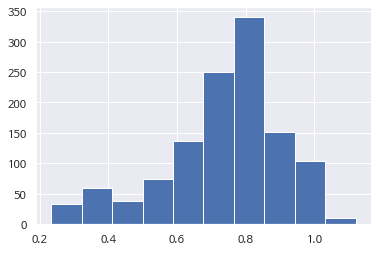

In [16]:
_ = plt.hist(train.actual_productivity, 10) # histogram : 빈도를 보는 그래프

### <span style = 'color:orange'> **plt.boxplot(df['컬럼'])** </span>
* 이상치 확인에 주로 사용

1. 자료의 특성을 요약하는 그래프
2. 다섯 숫자 요약 : 최대, 최소, 1사분위수, 3사분위수, 중앙값
3. 데이터 사이언스에서는 주로 이상치 확인을 위해 그림
4. **예시) 요일 별 지출 정보 (day vs total_bill)**
5. x: 컬럼, y: 통계
6. **`plt.boxplot(df[’컬럼’])`**

### <span style = 'color:orange'> **plt.pie(x, labels = y)** </span>
* 전체 대비 차지 비율 확인에 적합

1. 전체에 대한 각 항목의 비율을 원 모양으로 나타낸 그래프
2. 백분율 데이터에 주로 사용
3. **예시) 관람등급 분포**
4. y: 카테고리, x: 빈도
5. **`plt.pie(빈도, labels = 카테고리)`**

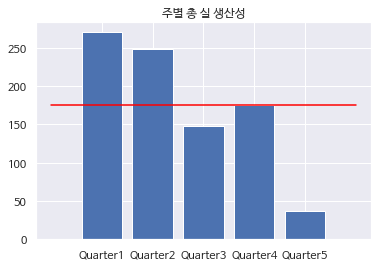

In [17]:
tmp = train.groupby('quarter').sum()[target]
_ = plt.bar(x = tmp.index, height = tmp.values)
_ = plt.plot([-1,len(tmp)], [tmp.values.mean(),tmp.values.mean()], color = 'red')
_ = plt.title('주별 총 실 생산성')

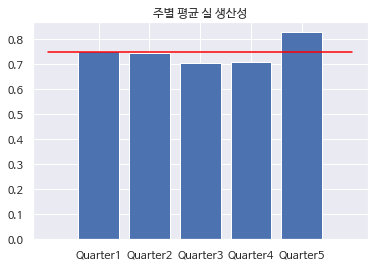

In [18]:
tmp = train.groupby('quarter').mean()[target]
_ = plt.bar(x = tmp.index, height = tmp.values)
_ = plt.plot([-1,len(tmp)], [tmp.values.mean(),tmp.values.mean()], color = 'red')
_ = plt.title('주별 평균 실 생산성')

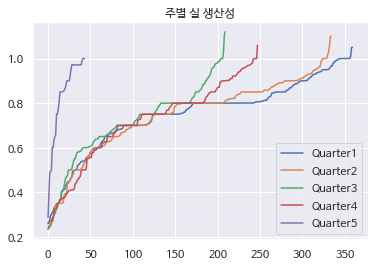

In [19]:
def quarter(num):
    tmp = train[train.quarter==f'Quarter{num}'][target].reset_index(drop = True)
    tmp.sort_values(inplace = True)
    tmp.reset_index(drop = True, inplace = True)
    return tmp

tmp1 = quarter(1)
_ = tmp1.plot()
# _ = plt.scatter(tmp.index, tmp.values)

tmp2 = quarter(2)
_ = tmp2.plot()

tmp3 = quarter(3)
_ = tmp3.plot()

tmp4 = quarter(4)
_ = tmp4.plot()

tmp5 = quarter(5)
_ = tmp5.plot()

_ = plt.title('주별 실 생산성')
_ = plt.legend(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'])

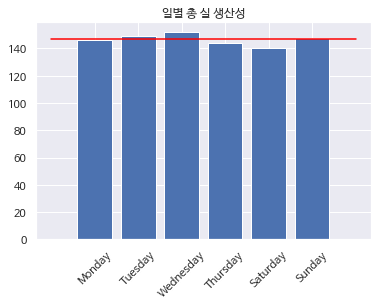

In [20]:
tmp = train.groupby('day').sum()[[target]]
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])}
tmp['num'] = tmp.index.map(day2num)
tmp.sort_values('num', inplace = True)

_ = plt.bar(x = tmp.index, height = tmp[target])
_ = plt.plot([-1,len(tmp)], [tmp[target].mean(),tmp[target].mean()], color = 'red')

_ = plt.xticks(rotation = 45)
_ = plt.title('일별 총 실 생산성')

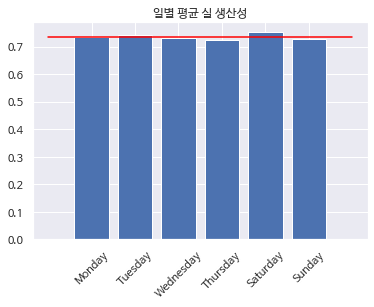

In [21]:
tmp = train.groupby('day').mean()[[target]]
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])} # 'Friday', 
tmp['num'] = tmp.index.map(day2num)
tmp.sort_values('num', inplace = True)

_ = plt.bar(x = tmp.index, height = tmp[target])
_ = plt.plot([-1,len(tmp)], [tmp[target].mean(),tmp[target].mean()], color = 'red')

_ = plt.xticks(rotation = 45)
_ = plt.title('일별 평균 실 생산성')

In [22]:
train.groupby('department').sum()[target]

department
finishing    380.99299
sweing       498.91090
Name: actual_productivity, dtype: float64

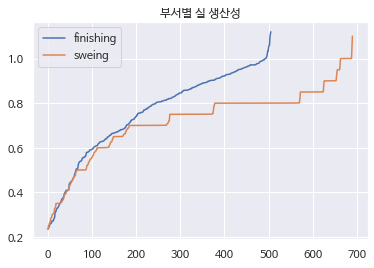

In [23]:
_ = train[train.department=='finishing'][target].sort_values().reset_index(drop = True).plot()
_ = train[train.department=='sweing'][target].sort_values().reset_index(drop = True).plot()

_ = plt.title('부서별 실 생산성')
_ = plt.legend(['finishing', 'sweing'])

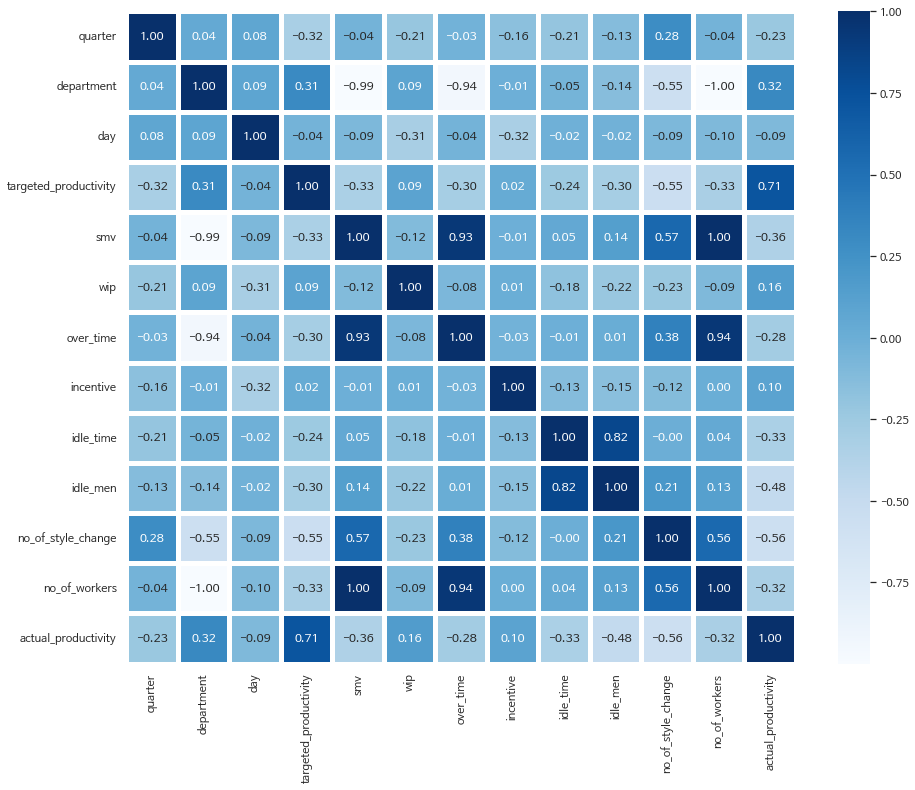

In [24]:
## 문자형으로 된 범주형 데이터를 수치형으로 바꿔야 히트맵 그릴 수 있음.
train_df = train.copy()

quarter2num = {i:enu for enu, i in enumerate(train_df.quarter.unique())}
depart2num = {i:enu for enu, i in enumerate(train_df.department.unique())}
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])} # 'Friday', 

train_df.quarter = train_df.quarter.map(quarter2num)
train_df.department = train_df.department.map(depart2num)
train_df.day = train_df.day.map(day2num)

corr = train_df.corr()
corr2 = corr.apply(lambda x : round(x,2))
_ = plt.figure(figsize = (15,12))
_ = sns.heatmap(corr2.corr(method = 'pearson'), # 상관관계
                annot = True, # 값 표시
                fmt = '.2f',
                linewidth = 5, # 나누는 선
                cmap = 'Blues') # 색상 팔레트

In [25]:
def vibox(var): # 양적변수
    _ = plt.figure(figsize = (5, 8))
    _ = plt.violinplot(var, data = train)
    _ = plt.boxplot(var, data = train)
    _ = plt.title(f'{var} 이상치 및 분포')

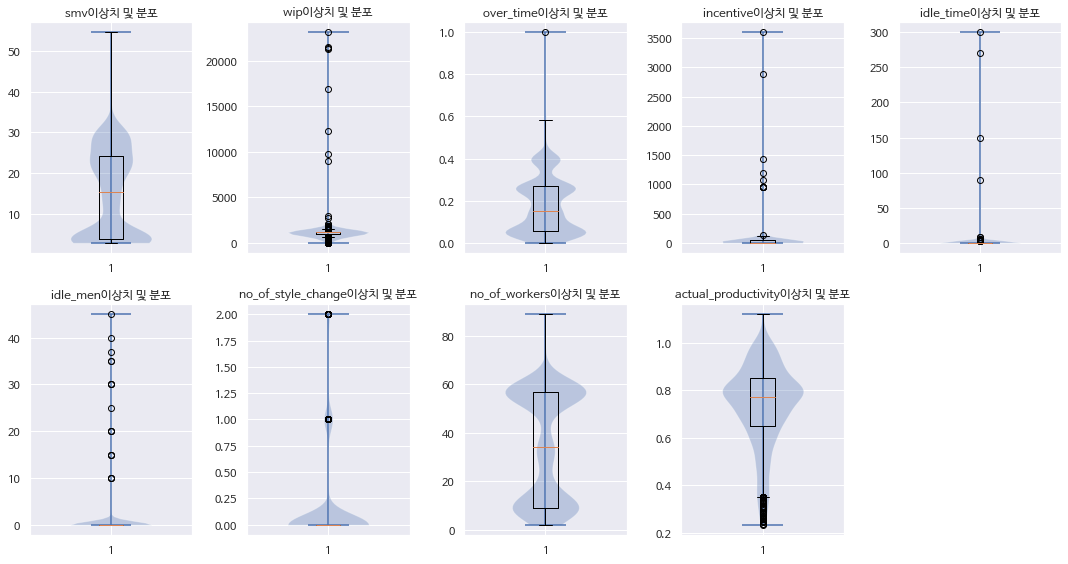

In [26]:
## for loop 밖에서 그림판 먼저 만들어주기
fig = plt.figure(figsize = (15, 8))
rows = 2
cols = 5
for enu,i in enumerate(train.columns[5:]):
    ax = fig.add_subplot(rows, cols, enu+1)
    # vibox(i)
    _ = ax.violinplot(i, data = train)
    _ = ax.boxplot(i, data = train)
    _ = ax.set_title(i + '이상치 및 분포')
plt.tight_layout()


# 한글 설정

## 적용을 희망하는 폰트의 영어이름 알아내기

In [ ]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
for i in font_list[:]:
    if 'Nanum' in i:
        print(i)

## 한글폰트 영구 등록

In [ ]:
mpl.matplotlib_fname()

In [ ]:
##설정 파일 위치
print (mpl.matplotlib_fname())
# 출력된 위치의 파일을 메모장이나 워드패드로 열어서 font.family를 찾아서 변경